In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
cap_data = pd.read_csv("Cab_Data.csv",parse_dates = ["Date of Travel"],)
cap_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [4]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_id = pd.read_csv("Customer_ID.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
transactions_id = pd.read_csv("Transaction_ID.csv")
transactions_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transactions_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [9]:
df = cap_data.set_index('Transaction ID').join(transactions_id.set_index('Transaction ID'))

In [10]:
master = df.set_index('Customer ID').join(customer_id.set_index('Customer ID'))

In [11]:
master = master.reset_index()
master.head()

,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,1,2016-02-06,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,Cash,Male,36,16359
1,1,2016-03-04,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,Card,Male,36,16359
2,1,2016-07-13,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,Card,Male,36,16359
3,1,2016-07-24,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,Cash,Male,36,16359
4,1,2016-09-03,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,Cash,Male,36,16359


In [12]:
master.Gender = pd.Categorical(master.Gender)
master.Payment_Mode = pd.Categorical(master.Payment_Mode)
master.Company = pd.Categorical(master.Company)
master.City = pd.Categorical(master.City)

In [13]:
master["Gender code"] = master.Gender.cat.codes
master["Payment_Mode_code"] = master.Payment_Mode.cat.codes
master["Company_code"] = master.Company.cat.codes
master["City_code"] = master.City.cat.codes
master["Profit"] = master["Price Charged"]-master["Cost of Trip"]

In [14]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Payment_Mode        359392 non-null  category      
 8   Gender              359392 non-null  category      
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
 11  Gender code         359392 non-null  int8          
 12  Payment_Mode_code   359392 non-null  int8          
 13  Company_code        359392 no

## Total profit

In [15]:
df_by_comp = master.set_index("Company")
total = df_by_comp.reset_index().groupby('Company').sum()
total["Price Charged"]-total["Cost of Trip"]

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
dtype: float64

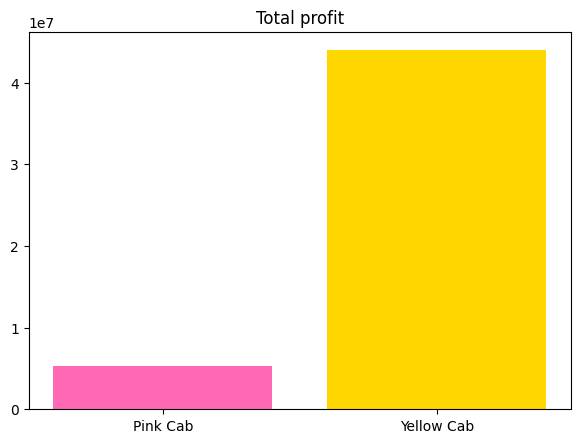

In [16]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar((total["Price Charged"]-total["Cost of Trip"]).index, height=total["Price Charged"]-total["Cost of Trip"],color=["hotpink","gold"])
plt.title('Total profit');

# Total customers

In [17]:
# Count
df_by_comp.reset_index().groupby('Company').count()["Price Charged"]

Company
Pink Cab       84711
Yellow Cab    274681
Name: Price Charged, dtype: int64

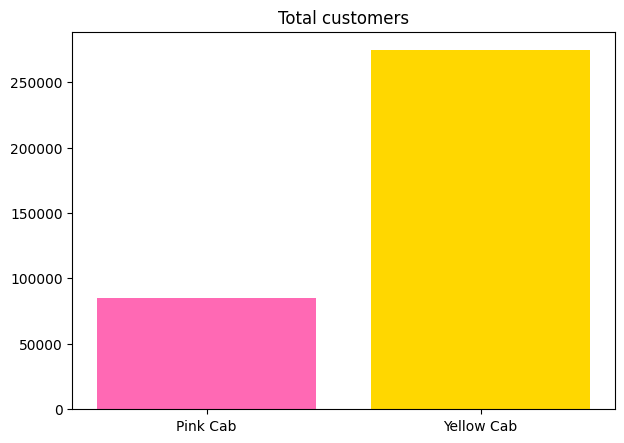

In [18]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar((df_by_comp.reset_index().groupby('Company').count()["Price Charged"]).index, height=df_by_comp.reset_index().groupby('Company').count()["Price Charged"],color= ["hotpink","gold"])
plt.title('Total customers');

# Master dataframe

In [19]:
master["Year"] = master['Date of Travel'].dt.year

In [20]:
master.head()

,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Gender code,Payment_Mode_code,Company_code,City_code,Profit,Year
0,1,2016-02-06,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,Cash,Male,36,16359,1,1,1,9,846.2712,2016
1,1,2016-03-04,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,Card,Male,36,16359,1,0,0,9,245.1700,2016
2,1,2016-07-13,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,Card,Male,36,16359,1,0,1,9,132.7368,2016
3,1,2016-07-24,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,Cash,Male,36,16359,1,1,1,9,285.7888,2016
4,1,2016-09-03,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,Cash,Male,36,16359,1,1,1,9,302.1568,2016


In [21]:
master["No"] = np.array([1]*len(master))

# Profit frequency

In [22]:
master["Profit"]
bins = list(range(-200,1600,100))+[np.inf]
names = []
for i in range(-200,1600,100):
    names.append(i)

master_profit_freq = master.copy()
master_profit_freq["ProfitRange"] = pd.cut(master_profit_freq["Profit"], bins, labels=names)
master_profit_freq = master_profit_freq.sort_values(by = ["Company","ProfitRange"])
master_profit_freq_box = master_profit_freq.set_index(["Company","ProfitRange"])
master_profit_freq_pink = master_profit_freq_box[master_profit_freq_box.index.get_level_values('Company')=="Pink Cab"].sum(level = 1)
master_profit_freq_yellow = master_profit_freq_box[master_profit_freq_box.index.get_level_values('Company')=="Yellow Cab"].sum(level = 1)

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/4001477470.py:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_profit_freq_pink = master_profit_freq_box[master_profit_freq_box.index.get_level_values('Company')=="Pink Cab"].sum(level = 1)
c:\users\الطارق\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:10170: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  return getattr(grouped, name)(**kwargs)
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/4001477470.py:12: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1

In [23]:
master_profit_freq_pink

,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Gender code,Payment_Mode_code,Company_code,City_code,Profit,Year,No
ProfitRange,,,,,,,,,,,,,
-200,3719662,4791.04,40657.55,5.532079e+04,4717,1885901,68.0,60.0,0.0,835.0,-14663.238,250086,124
-100,245904841,243241.58,2537723.26,2.749512e+06,389598,165603095,6027.0,4389.0,0.0,80760.0,-211788.911,22199410,11006
0,1012478994,1030617.87,13447673.68,1.134156e+07,1907710,811428124,30123.0,21782.0,0.0,452131.0,2106117.339,108800113,53939
100,235419656,448797.72,6914558.54,4.884377e+06,510993,218852855,8101.0,5682.0,0.0,127980.0,2030181.065,29336864,14545
200,49812185,133492.43,2350371.44,1.447245e+06,133060,57589056,2172.0,1542.0,0.0,34096.0,903126.558,7623786,3780
300,10079868,37597.32,743611.63,4.066958e+05,34819,15542787,573.0,395.0,0.0,9138.0,336915.814,2002652,993
400,2385777,9267.83,204857.90,1.003521e+05,8332,3612837,124.0,106.0,0.0,2169.0,104505.824,481982,239
500,358977,1939.43,47555.87,2.105591e+04,1675,670936,26.0,21.0,0.0,403.0,26499.961,98812,49
600,168942,513.99,15351.42,5.747788e+03,483,196636,6.0,9.0,0.0,121.0,9603.632,30254,15


Text(0.5, 1.0, 'Yellow Cab')

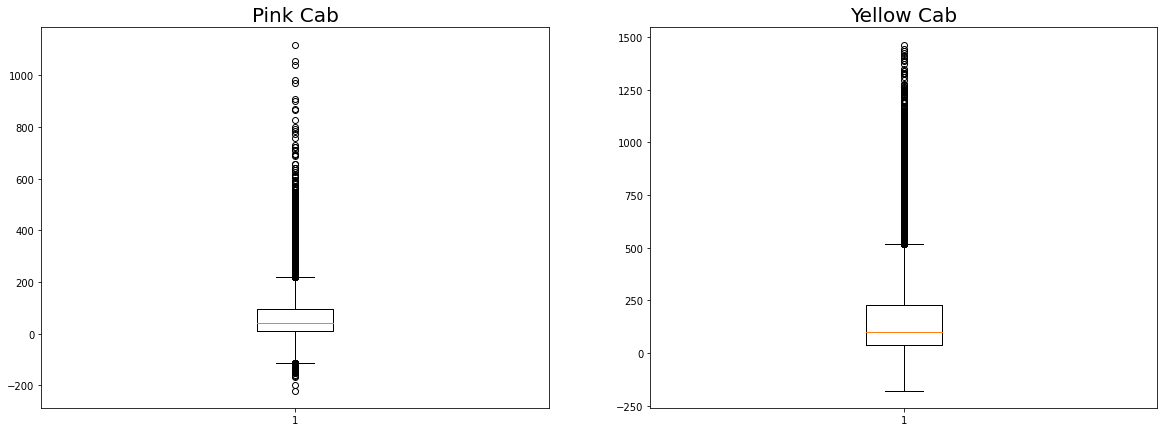

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
ax1.boxplot(master_profit_freq_box[master_profit_freq_box.index.get_level_values('Company')=="Pink Cab"]['Profit'])
ax1.set_title('Pink Cab', fontsize=20)
ax2.boxplot(master_profit_freq_box[master_profit_freq_box.index.get_level_values('Company')=="Yellow Cab"]['Profit'])
ax2.set_title('Yellow Cab', fontsize=20)

Text(0.5, 1.0, 'Yellow Cab')

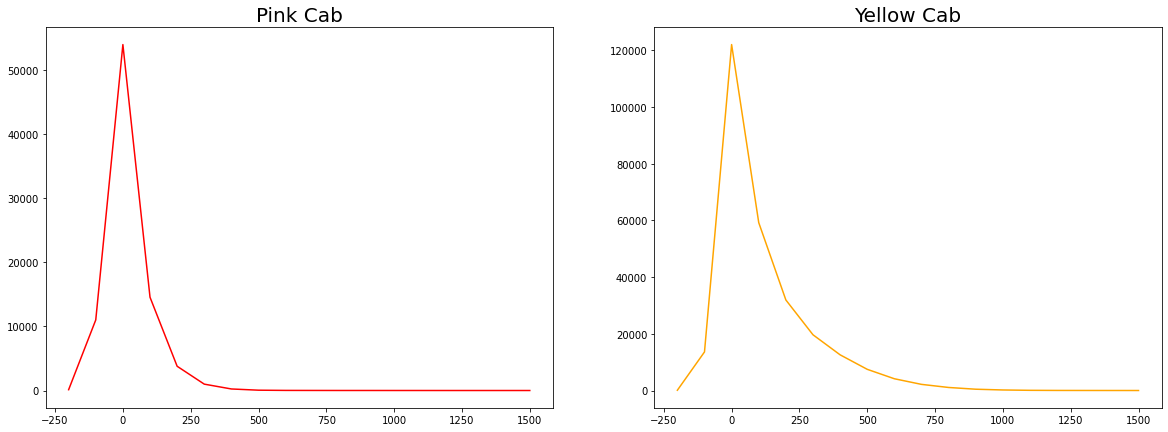

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
ax1.plot(names,master_profit_freq_pink["No"],color = "red")
ax1.set_title('Pink Cab', fontsize=20)
ax2.plot(names,master_profit_freq_yellow["No"],color = "orange")
ax2.set_title('Yellow Cab', fontsize=20)

# Profit company and year wise

In [26]:
master_by_year_company = master.set_index(["Year","Company"])
master_by_year_company = pd.DataFrame(master_by_year_company["Profit"].sum(level = ["Company","Year"]))

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1914348498.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_year_company = pd.DataFrame(master_by_year_company["Profit"].sum(level = ["Company","Year"]))


Text(0.5, 1.0, 'Yellow Cab')

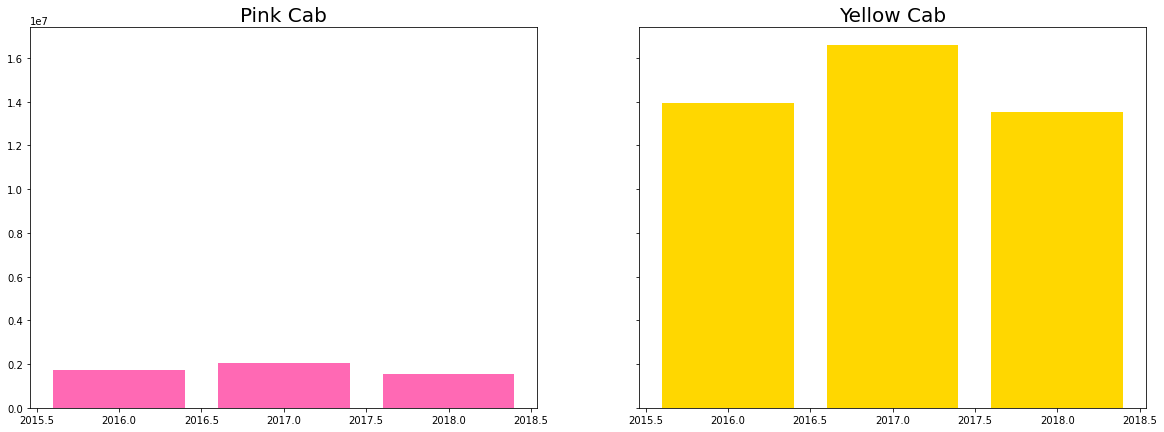

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7),sharey = True)
ax1.bar([2016,2017,2018],master_by_year_company[master_by_year_company.index.get_level_values('Company')=="Pink Cab"]['Profit'],color = "hotpink")
ax1.set_title('Pink Cab', fontsize=20)
ax2.bar([2016,2017,2018],master_by_year_company[master_by_year_company.index.get_level_values('Company')=="Yellow Cab"]['Profit'],color = "gold")
ax2.set_title('Yellow Cab', fontsize=20)

# Profit city wise

In [28]:
master_by_year_City = master.set_index(["City"])
master_by_y_c_ploy = pd.DataFrame(master_by_year_City["Profit"].sum(level = ["City"]))

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1842582704.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_y_c_ploy = pd.DataFrame(master_by_year_City["Profit"].sum(level = ["City"]))


<BarContainer object of 19 artists>

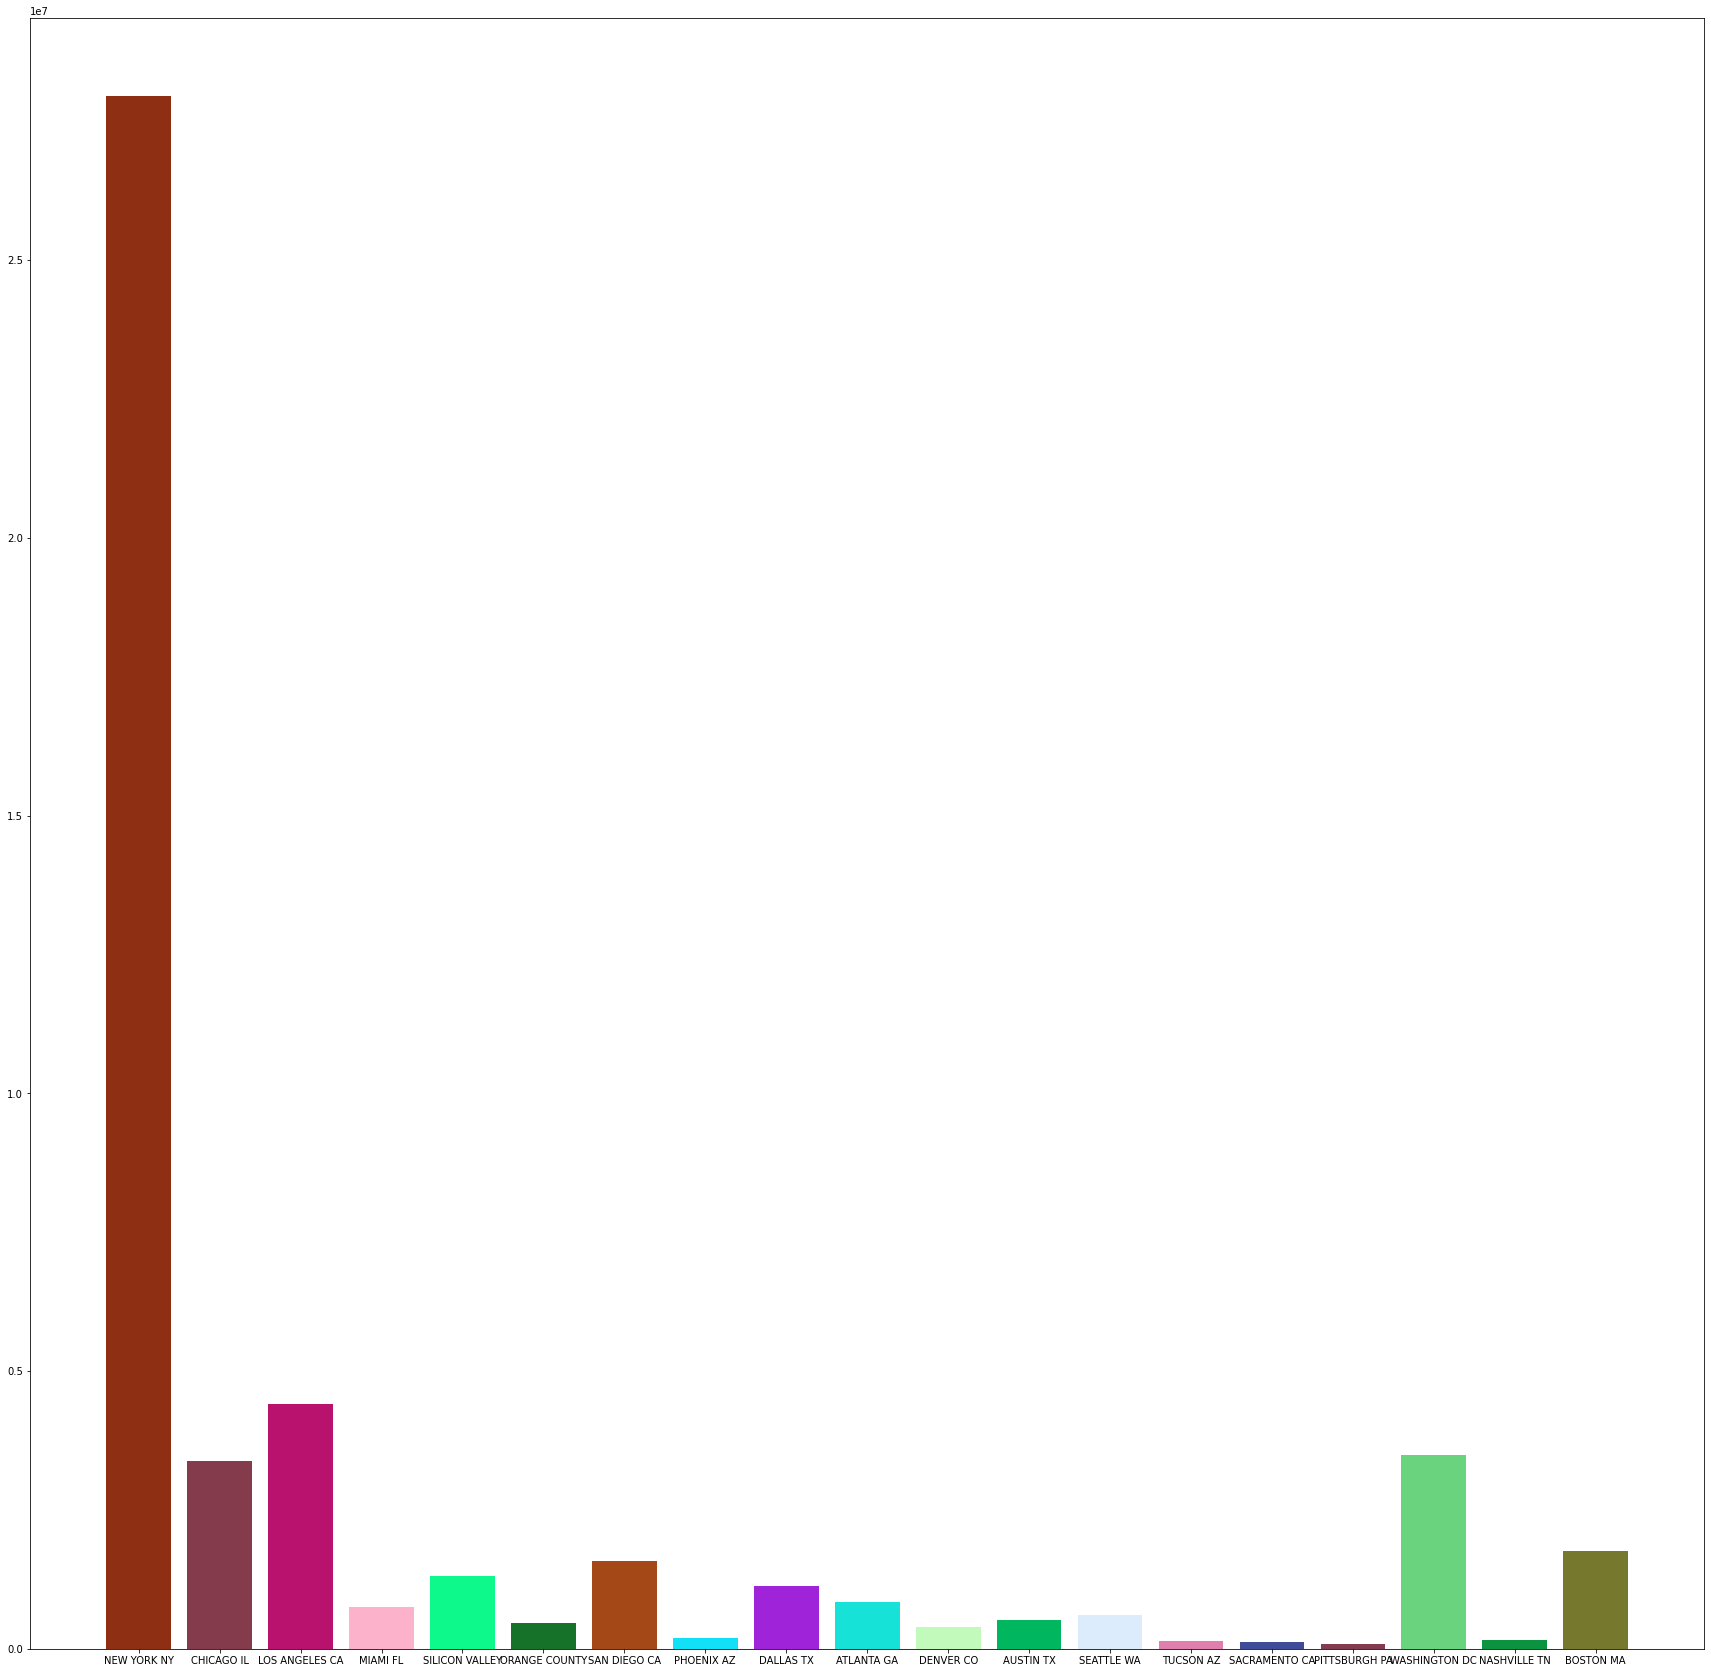

In [29]:
plt.figure(figsize=(30,30))
plt.bar(master_by_y_c_ploy.index,master_by_y_c_ploy["Profit"],color=np.random.rand(len(master_by_y_c_ploy.index),3))#,bins = list(master_by_year_City["Profit"].sum(level = ["City"]).index)

# Monthly profit

In [30]:
master["Month"] = master['Date of Travel'].dt.month

In [31]:
master_by_month_company = master.set_index(["Year","Month","Company"])
master_by_month_company["Profit"].sum(level = ["Company","Year","Month"])

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1764426748.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_month_company["Profit"].sum(level = ["Company","Year","Month"])


Company     Year  Month
Pink Cab    2016  1        7.395286e+04
                  2        8.747554e+04
                  3        8.780118e+04
                  4        8.259185e+04
                  5        6.155096e+04
                               ...     
Yellow Cab  2018  8        8.869987e+05
                  9        1.218804e+06
                  10       1.273756e+06
                  11       1.416933e+06
                  12       1.566886e+06
Name: Profit, Length: 72, dtype: float64

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/358217779.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_month_company["Profit"][master_by_month_company["Company_code"]==0].sum(level = ["Year","Month"]).plot(color = "hotpink")
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/358217779.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_month_company["Profit"][master_by_month_company["Company_code"]==1].sum(level = ["Year","Month"]).plot(color = "gold")


<AxesSubplot:xlabel='Year,Month'>

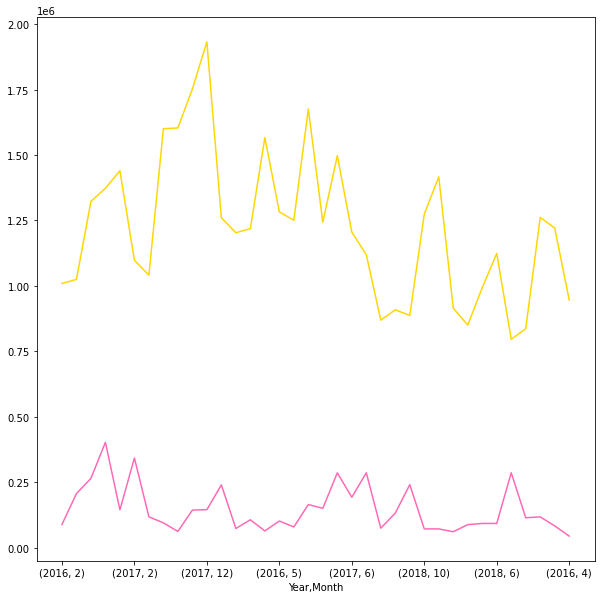

In [32]:
plt.figure(figsize=(10,10))
master_by_month_company["Profit"][master_by_month_company["Company_code"]==0].sum(level = ["Year","Month"]).plot(color = "hotpink")
master_by_month_company["Profit"][master_by_month_company["Company_code"]==1].sum(level = ["Year","Month"]).plot(color = "gold")

# Profit sex wise

In [33]:
master_by_year_sex = master.set_index(["Year","Company","Gender"])
master_by_year_sex = pd.DataFrame(master_by_year_sex["Profit"].sum(level = ["Year","Company","Gender"]))
master_by_year_sex

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1107966971.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_year_sex = pd.DataFrame(master_by_year_sex["Profit"].sum(level = ["Year","Company","Gender"]))


Profit
Year Company    Gender              
2016 Pink Cab   Female  7.363017e+05
                Male    9.772096e+05
     Yellow Cab Female  5.581321e+06
                Male    8.345674e+06
2017 Pink Cab   Female  8.969250e+05
                Male    1.136730e+06
     Yellow Cab Female  6.904150e+06
                Male    9.671828e+06
2018 Pink Cab   Female  6.973061e+05
                Male    8.628561e+05
     Yellow Cab Female  5.645946e+06
                Male    7.871454e+06

Text(0.5, 1.0, '2018 Yellow Cab')

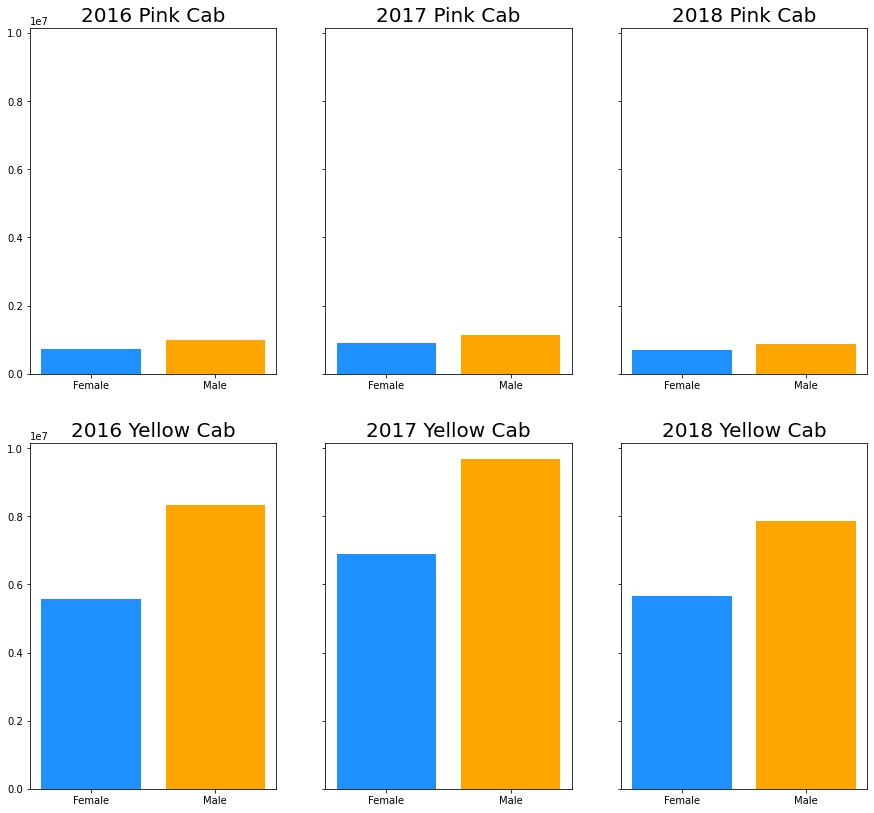

In [34]:
fig, ax = plt.subplots(2,3, figsize=(15,14),sharey = True )#sharex = True
ax[0,0].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2016)& (master_by_year_sex.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[0,0].set_title('2016 Pink Cab', fontsize=20)
ax[0,1].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2017) & (master_by_year_sex.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[0,1].set_title('2017 Pink Cab', fontsize=20)
ax[0,2].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2018)& (master_by_year_sex.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[0,2].set_title('2018 Pink Cab', fontsize=20)

ax[1,0].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2016)& (master_by_year_sex.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[1,0].set_title('2016 Yellow Cab', fontsize=20)
ax[1,1].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2017) & (master_by_year_sex.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[1,1].set_title('2017 Yellow Cab', fontsize=20)
ax[1,2].bar(["Female","Male"],master_by_year_sex[(master_by_year_sex.index.get_level_values('Year')==2018)& (master_by_year_sex.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = ["dodgerblue","orange"])
ax[1,2].set_title('2018 Yellow Cab', fontsize=20)


# Income class wise

In [35]:
bins = [0,2500, 15000, np.inf]
names = ['<2500', '2500-15000', '>15000',]
master_by_income_company = master.copy()
master_by_income_company["IncomeRange"] = pd.cut(master_by_income_company["Income (USD/Month)"], bins, labels=names)
master_by_income_company = master_by_income_company.set_index(["Year","Company","IncomeRange"])
master_by_income_company = pd.DataFrame(master_by_income_company["Profit"].sum(level = ["Year","Company","IncomeRange"]))
master_by_income_company

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/2423122445.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_income_company = pd.DataFrame(master_by_income_company["Profit"].sum(level = ["Year","Company","IncomeRange"]))


Profit
Year Company    IncomeRange              
2016 Pink Cab   <2500        3.175023e+04
                2500-15000   8.185171e+05
                >15000       8.632439e+05
     Yellow Cab <2500        2.572513e+05
                2500-15000   6.803840e+06
                >15000       6.865904e+06
2017 Pink Cab   <2500        4.148073e+04
                2500-15000   9.956372e+05
                >15000       9.965370e+05
     Yellow Cab <2500        3.276664e+05
                2500-15000   8.033054e+06
                >15000       8.215257e+06
2018 Pink Cab   <2500        3.396248e+04
                2500-15000   7.656181e+05
                >15000       7.605816e+05
     Yellow Cab <2500        2.576184e+05
                2500-15000   6.579957e+06
                >15000       6.679825e+06

Text(0.5, 1.0, '2018 Yellow Cab')

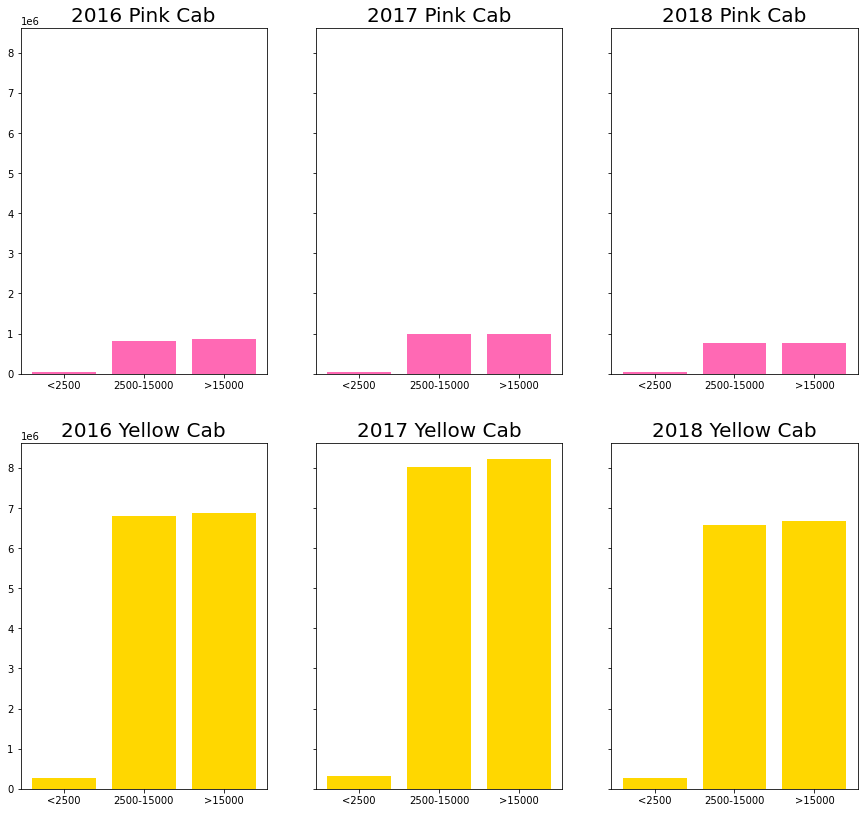

In [36]:
fig, ax = plt.subplots(2,3, figsize=(15,14),sharey = True )#sharex = True
ax[0,0].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2016)& (master_by_income_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,0].set_title('2016 Pink Cab', fontsize=20)
ax[0,1].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2017) & (master_by_income_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,1].set_title('2017 Pink Cab', fontsize=20)
ax[0,2].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2018)& (master_by_income_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,2].set_title('2018 Pink Cab', fontsize=20)

ax[1,0].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2016)& (master_by_income_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,0].set_title('2016 Yellow Cab', fontsize=20)
ax[1,1].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2017) & (master_by_income_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,1].set_title('2017 Yellow Cab', fontsize=20)
ax[1,2].bar(names,master_by_income_company[(master_by_income_company.index.get_level_values('Year')==2018)& (master_by_income_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,2].set_title('2018 Yellow Cab', fontsize=20)


# Age wise

In [37]:
bins = [18,25, 40,60, np.inf]
names = ['18-25', '26-40', '40-60','60+']
master_by_age_company = master.copy()
master_by_age_company["AgeRange"] = pd.cut(master_by_age_company["Age"], bins, labels=names)
master_by_age_company = master_by_age_company.set_index(["Year","Company","AgeRange"])
master_by_age_company = pd.DataFrame(master_by_age_company["Profit"].sum(level = ["Year","Company","AgeRange"]))
master_by_age_company

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1367190511.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_age_company = pd.DataFrame(master_by_age_company["Profit"].sum(level = ["Year","Company","AgeRange"]))


Profit
Year Company    AgeRange              
2016 Pink Cab   18-25     3.856375e+05
                26-40     8.133596e+05
                40-60     3.652666e+05
                60+       9.539729e+04
     Yellow Cab 18-25     3.173525e+06
                26-40     6.626638e+06
                40-60     3.016118e+06
                60+       6.843077e+05
2017 Pink Cab   18-25     4.823270e+05
                26-40     9.484490e+05
                40-60     4.302286e+05
                60+       1.041023e+05
     Yellow Cab 18-25     3.801807e+06
                26-40     7.794649e+06
                40-60     3.620168e+06
                60+       8.366096e+05
2018 Pink Cab   18-25     3.701480e+05
                26-40     7.391177e+05
                40-60     3.256414e+05
                60+       8.109499e+04
     Yellow Cab 18-25     3.125490e+06
                26-40     6.355699e+06
                40-60     2.969382e+06
                60+       6.720261e+05

Text(0.5, 1.0, '2018 Yellow Cab')

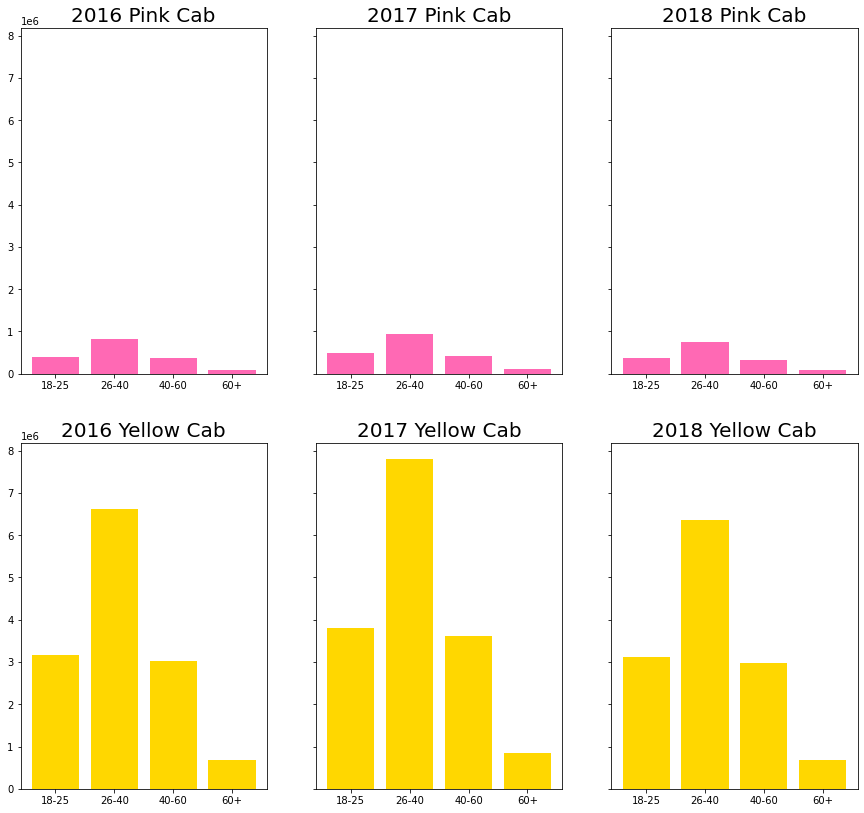

In [38]:
fig, ax = plt.subplots(2,3, figsize=(15,14),sharey = True )#sharex = True
ax[0,0].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2016)& (master_by_age_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,0].set_title('2016 Pink Cab', fontsize=20)
ax[0,1].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2017) & (master_by_age_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,1].set_title('2017 Pink Cab', fontsize=20)
ax[0,2].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2018)& (master_by_age_company.index.get_level_values('Company')=="Pink Cab")]['Profit'],color = "hotpink")
ax[0,2].set_title('2018 Pink Cab', fontsize=20)

ax[1,0].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2016)& (master_by_age_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,0].set_title('2016 Yellow Cab', fontsize=20)
ax[1,1].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2017) & (master_by_age_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,1].set_title('2017 Yellow Cab', fontsize=20)
ax[1,2].bar(names,master_by_age_company[(master_by_age_company.index.get_level_values('Year')==2018)& (master_by_age_company.index.get_level_values('Company')=="Yellow Cab")]['Profit'],color = "gold")
ax[1,2].set_title('2018 Yellow Cab', fontsize=20)


# User City wise

In [39]:
master_by_user_city = master.set_index(["Company","City","Customer ID"])
master_by_user_city = pd.DataFrame(master_by_user_city[["Profit","No"]].sum(level = ["Company","City"]))
master_by_user_city

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/3525472769.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  master_by_user_city = pd.DataFrame(master_by_user_city[["Profit","No"]].sum(level = ["Company","City"]))


Profit     No
Company    City                               
Pink Cab   ATLANTA GA      9.605008e+04   1762
           AUSTIN TX       1.474453e+05   1868
           BOSTON MA       2.620017e+05   5186
           CHICAGO IL      3.187225e+05   9361
           DALLAS TX       2.473011e+04   1380
           DENVER CO       4.058494e+04   1394
           LOS ANGELES CA  1.125732e+06  19865
           MIAMI FL        1.623012e+05   2002
           NASHVILLE TN    6.428453e+04   1841
           NEW YORK NY     1.511474e+06  13967
           ORANGE COUNTY   1.019958e+05   1513
           PHOENIX AZ      3.559639e+04    864
           PITTSBURGH PA   1.710774e+04    682
           SACRAMENTO CA   5.532401e+04   1334
           SAN DIEGO CA    6.378898e+05  10672
           SEATTLE WA      1.127813e+05   2732
           SILICON VALLEY  3.402505e+05   3797
           TUCSON AZ       5.928957e+04    799
           WASHINGTON DC   1.937664e+05   3692
Yellow Cab ATLANTA GA      7.463828e+05   5795
           AUSTIN TX       3.792557e+05   3028
           BOSTON MA       1.506718e+06  24506
           CHICAGO IL      3.068591e+06  47264
           DALLAS TX       1.104003e+06   5637
           DENVER CO       3.570001e+05   2431
           LOS ANGELES CA  3.285977e+06  28168
           MIAMI FL        5.960001e+05   4452
           NASHVILLE TN    8.524768e+04   1169
           NEW YORK NY     2.645108e+07  85918
           ORANGE COUNTY   3.550060e+05   2469
           PHOENIX AZ      1.573445e+05   1200
           PITTSBURGH PA   6.805822e+04    631
           SACRAMENTO CA   6.200218e+04   1033
           SAN DIEGO CA    9.492737e+05   9816
           SEATTLE WA      4.919035e+05   5265
           SILICON VALLEY  9.764547e+05   4722
           TUCSON AZ       8.097112e+04   1132
           WASHINGTON DC   3.299104e+06  40045

In [40]:
names = np.unique(np.array(master_by_user_city.index.get_level_values('City')))
names

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [41]:
pink_cab_perc = master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Pink Cab"].reset_index().drop(["Company"],axis = 1).set_index("City")*100/master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Pink Cab"].reset_index().drop(["Company"],axis = 1).set_index("City").add(master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Yellow Cab"].reset_index().drop(["Company"],axis = 1).set_index("City"))
yellow_cab_perc = master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Yellow Cab"].reset_index().drop(["Company"],axis = 1).set_index("City")*100/master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Pink Cab"].reset_index().drop(["Company"],axis = 1).set_index("City").add(master_by_user_city[master_by_user_city.index.get_level_values('Company')=="Yellow Cab"].reset_index().drop(["Company"],axis = 1).set_index("City"))

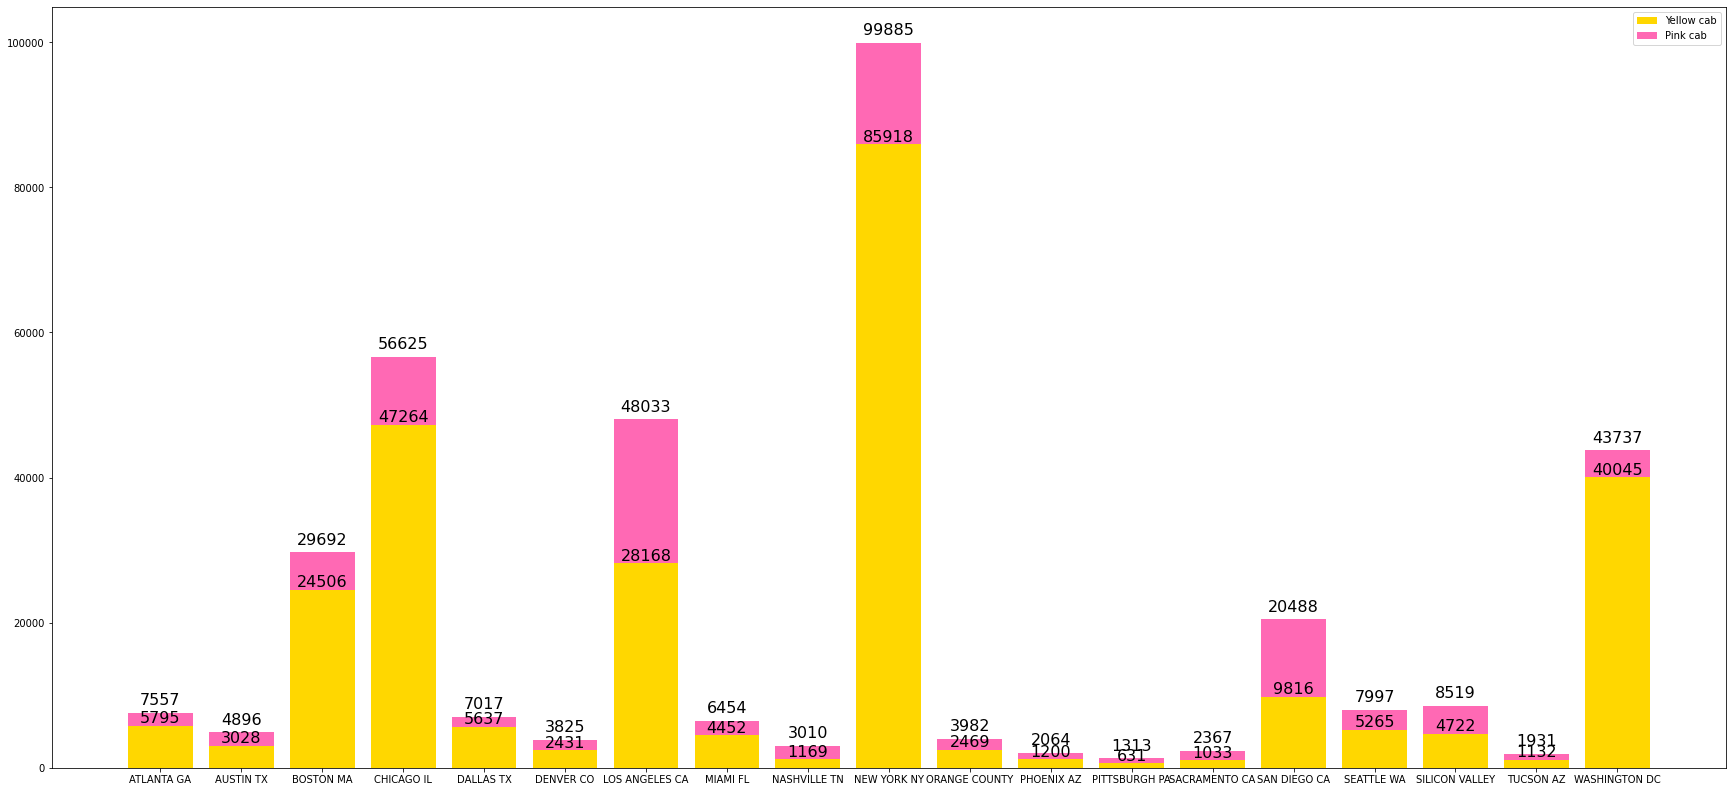

In [42]:
color=np.random.rand(len(master_by_y_c_ploy.index),3)

fig, ax = plt.subplots(figsize=(30,14),sharey = True )#sharex = True
rect1 = ax.bar(names,master_by_user_city[(master_by_user_city.index.get_level_values('Company')=="Yellow Cab")]['No'],color = "gold",label = "Yellow cab")
rect2 = ax.bar(names,master_by_user_city[(master_by_user_city.index.get_level_values('Company')=="Pink Cab")]['No'],color = "hotpink"
           ,bottom=master_by_user_city[(master_by_user_city.index.get_level_values('Company')=="Yellow Cab")]['No'],label="Pink cab")
ax.bar_label(rect1, padding=0,fontsize = 16)
ax.bar_label(rect2, padding=5,fontsize = 16)
ax.legend()

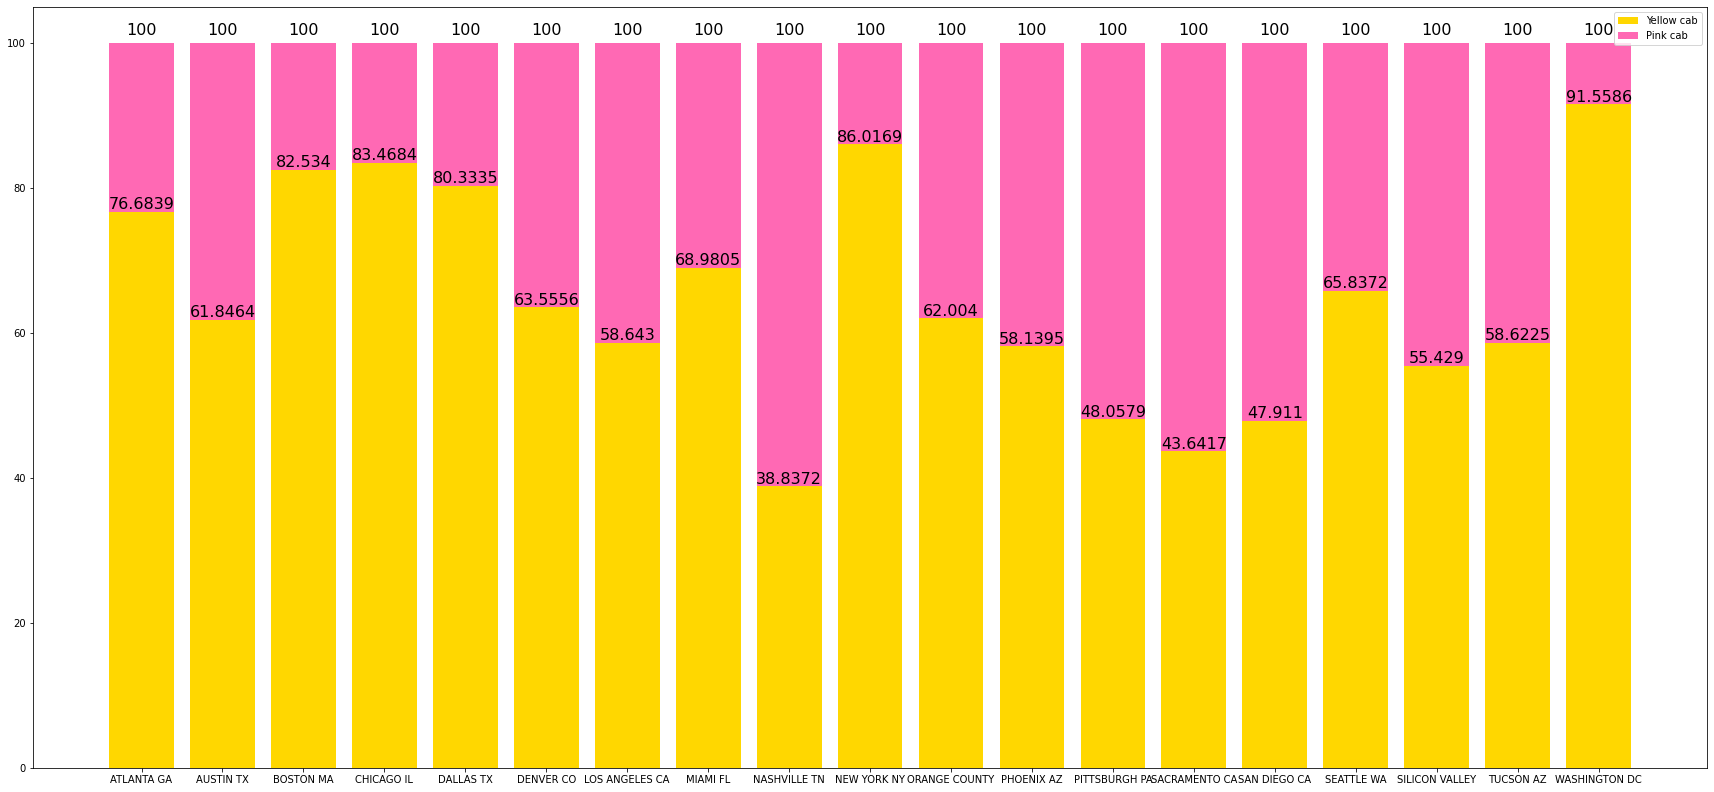

In [43]:
color=np.random.rand(len(master_by_y_c_ploy.index),3)

fig, ax = plt.subplots(figsize=(30,14),sharey = True )#sharex = True
rect1 = ax.bar(names,yellow_cab_perc["No"],color = "gold",label = "Yellow cab")
rect2 = ax.bar(names,pink_cab_perc["No"],color = "hotpink"
           ,bottom=yellow_cab_perc["No"],label="Pink cab")
ax.bar_label(rect1, padding=0,fontsize = 16)
ax.bar_label(rect2, padding=5,fontsize = 16)
ax.legend()

# Ride wise

In [44]:
master["Day_name"] = master["Date of Travel"].dt.day_name()

In [45]:
day_pink = pd.DataFrame(master["Day_name"][master["Company"]=="Pink Cab"].value_counts())
day_pink

,Day_name
Friday,19249
Saturday,18253
Sunday,16475
Thursday,9549
Tuesday,7077
Wednesday,7076
Monday,7032


In [46]:
day_yellow = pd.DataFrame(master["Day_name"][master["Company"]=="Yellow Cab"].value_counts())
day_yellow

,Day_name
Friday,62153
Saturday,59981
Sunday,53835
Thursday,30198
Wednesday,23026
Tuesday,22783
Monday,22705


In [47]:
day_yellow_perc = (day_yellow*100/day_yellow.add(day_pink)).astype(int)
day_pink_perc = (day_pink*100/day_yellow.add(day_pink)).astype(int)

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/4156409070.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_pink.index)


[Text(0, 3, '19249'),
 Text(0, 3, '18253'),
 Text(0, 3, '16475'),
 Text(0, 3, '9549'),
 Text(0, 3, '7077'),
 Text(0, 3, '7076'),
 Text(0, 3, '7032')]

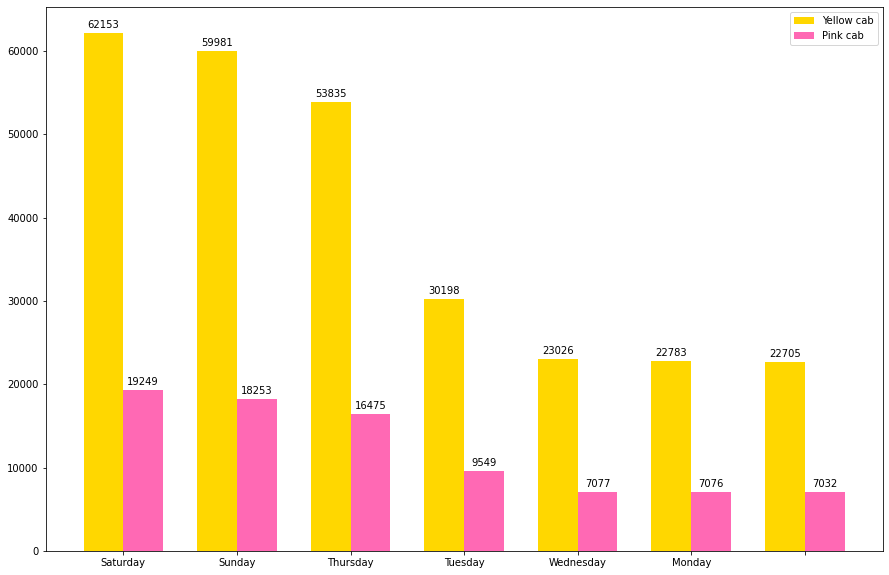

In [48]:
x = np.arange(len(day_pink.index))
width = .35
names = ["Friday","Saturday","Sunday","Thursday","Wednesday","Tuesday","Monday"]
fig, ax = plt.subplots(figsize=(15,10))#sharex = True
rect1 = ax.bar(x - width/2,day_yellow["Day_name"],width,color = "gold",label = "Yellow cab")
rect2 = ax.bar(x + width/2,day_pink["Day_name"],width,color = "hotpink",label = "Pink cab")
ax.set_xticklabels(day_pink.index)
ax.legend()
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/848694261.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_pink.index)


[Text(0, 3, '23'),
 Text(0, 3, '23'),
 Text(0, 3, '23'),
 Text(0, 3, '23'),
 Text(0, 3, '24'),
 Text(0, 3, '23'),
 Text(0, 3, '23')]

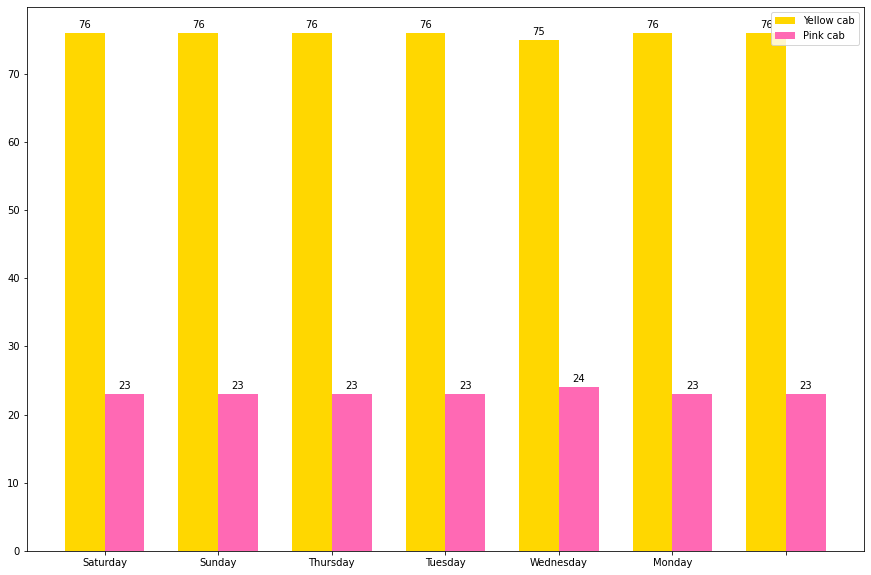

In [49]:
x = np.arange(len(day_pink.index))
width = .35

fig, ax = plt.subplots(figsize=(15,10))#sharex = True
rect1 = ax.bar(x - width/2,day_yellow_perc["Day_name"],width,color = "gold",label = "Yellow cab")
rect2 = ax.bar(x + width/2,day_pink_perc["Day_name"],width,color = "hotpink",label = "Pink cab")
ax.set_xticklabels(day_pink.index)
ax.legend()
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)

# Customer wise

In [50]:
day_pink_cust = pd.DataFrame(master[master["Company"]=="Pink Cab"].set_index(["Customer ID","Day_name"]).sum(level = 1)["No"])
day_yellow_cust = pd.DataFrame(master[master["Company"]=="Yellow Cab"].set_index(["Customer ID","Day_name"]).sum(level = 1)["No"])
day_pink_cust

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1337006959.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day_pink_cust = pd.DataFrame(master[master["Company"]=="Pink Cab"].set_index(["Customer ID","Day_name"]).sum(level = 1)["No"])
c:\users\الطارق\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:10170: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  return getattr(grouped, name)(**kwargs)
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1337006959.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should 

,No
Day_name,
Friday,19249
Sunday,16475
Saturday,18253
Wednesday,7076
Tuesday,7077
Thursday,9549
Monday,7032


C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/1307045322.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_pink.index)


[Text(0, 3, '19249'),
 Text(0, 3, '16475'),
 Text(0, 3, '18253'),
 Text(0, 3, '7076'),
 Text(0, 3, '7077'),
 Text(0, 3, '9549'),
 Text(0, 3, '7032')]

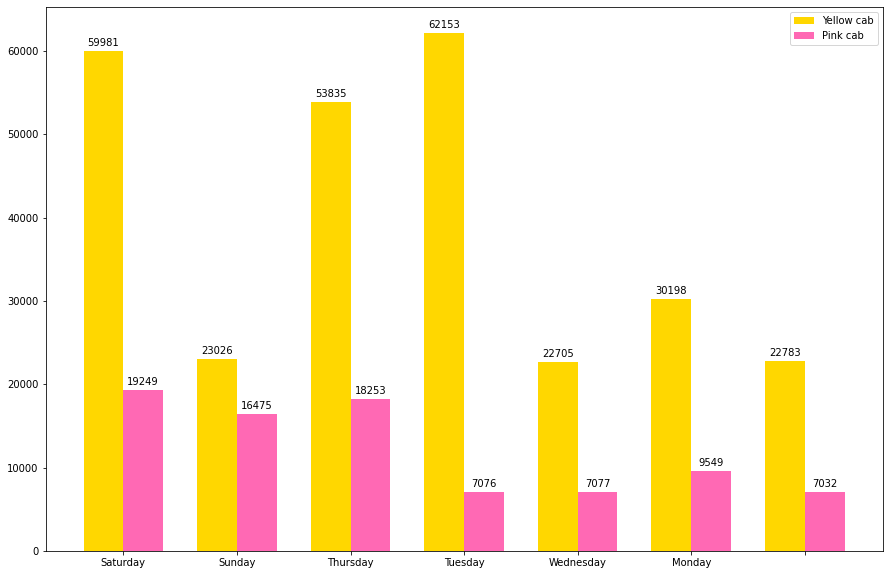

In [51]:
x = np.arange(len(day_pink.index))
width = .35

fig, ax = plt.subplots(figsize=(15,10))#sharex = True
rect1 = ax.bar(x - width/2,day_yellow_cust["No"],width,color = "gold",label = "Yellow cab")
rect2 = ax.bar(x + width/2,day_pink_cust["No"],width,color = "hotpink",label = "Pink cab")
ax.set_xticklabels(day_pink.index)
ax.legend()
ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)

# Customer Retention

In [52]:
day_pink_cust_ret = pd.DataFrame(master[master["Company"]=="Pink Cab"].set_index(["Customer ID","Year"]).sum(level = ["Customer ID","Year"])["No"])
day_pink_cust_ret["retention"] = 0
day_pink_cust_ret["retention"][day_pink_cust_ret["No"]>=5] = 1
day_pink_cust_ret["retention"][day_pink_cust_ret["No"]>=10] = 2

day_yellow_cust_ret = pd.DataFrame(master[master["Company"]=="Yellow Cab"].set_index(["Customer ID","Year"]).sum(level = ["Customer ID","Year"])["No"])
day_yellow_cust_ret["retention"] = 0
day_yellow_cust_ret["retention"][day_yellow_cust_ret["No"]>=5] = 1
day_yellow_cust_ret["retention"][day_yellow_cust_ret["No"]>=10] = 2

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/153979756.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day_pink_cust_ret = pd.DataFrame(master[master["Company"]=="Pink Cab"].set_index(["Customer ID","Year"]).sum(level = ["Customer ID","Year"])["No"])
c:\users\الطارق\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:10170: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  return getattr(grouped, name)(**kwargs)
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/153979756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [53]:
day_pink_cust_ret = day_pink_cust_ret.reset_index().set_index(["Year","retention"]).sum(level = ["Year","retention"])
day_yellow_cust_ret = day_yellow_cust_ret.reset_index().set_index(["Year","retention"]).sum(level =  ["Year","retention"])

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/2575340354.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day_pink_cust_ret = day_pink_cust_ret.reset_index().set_index(["Year","retention"]).sum(level = ["Year","retention"])
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/2575340354.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  day_yellow_cust_ret = day_yellow_cust_ret.reset_index().set_index(["Year","retention"]).sum(level =  ["Year","retention"])


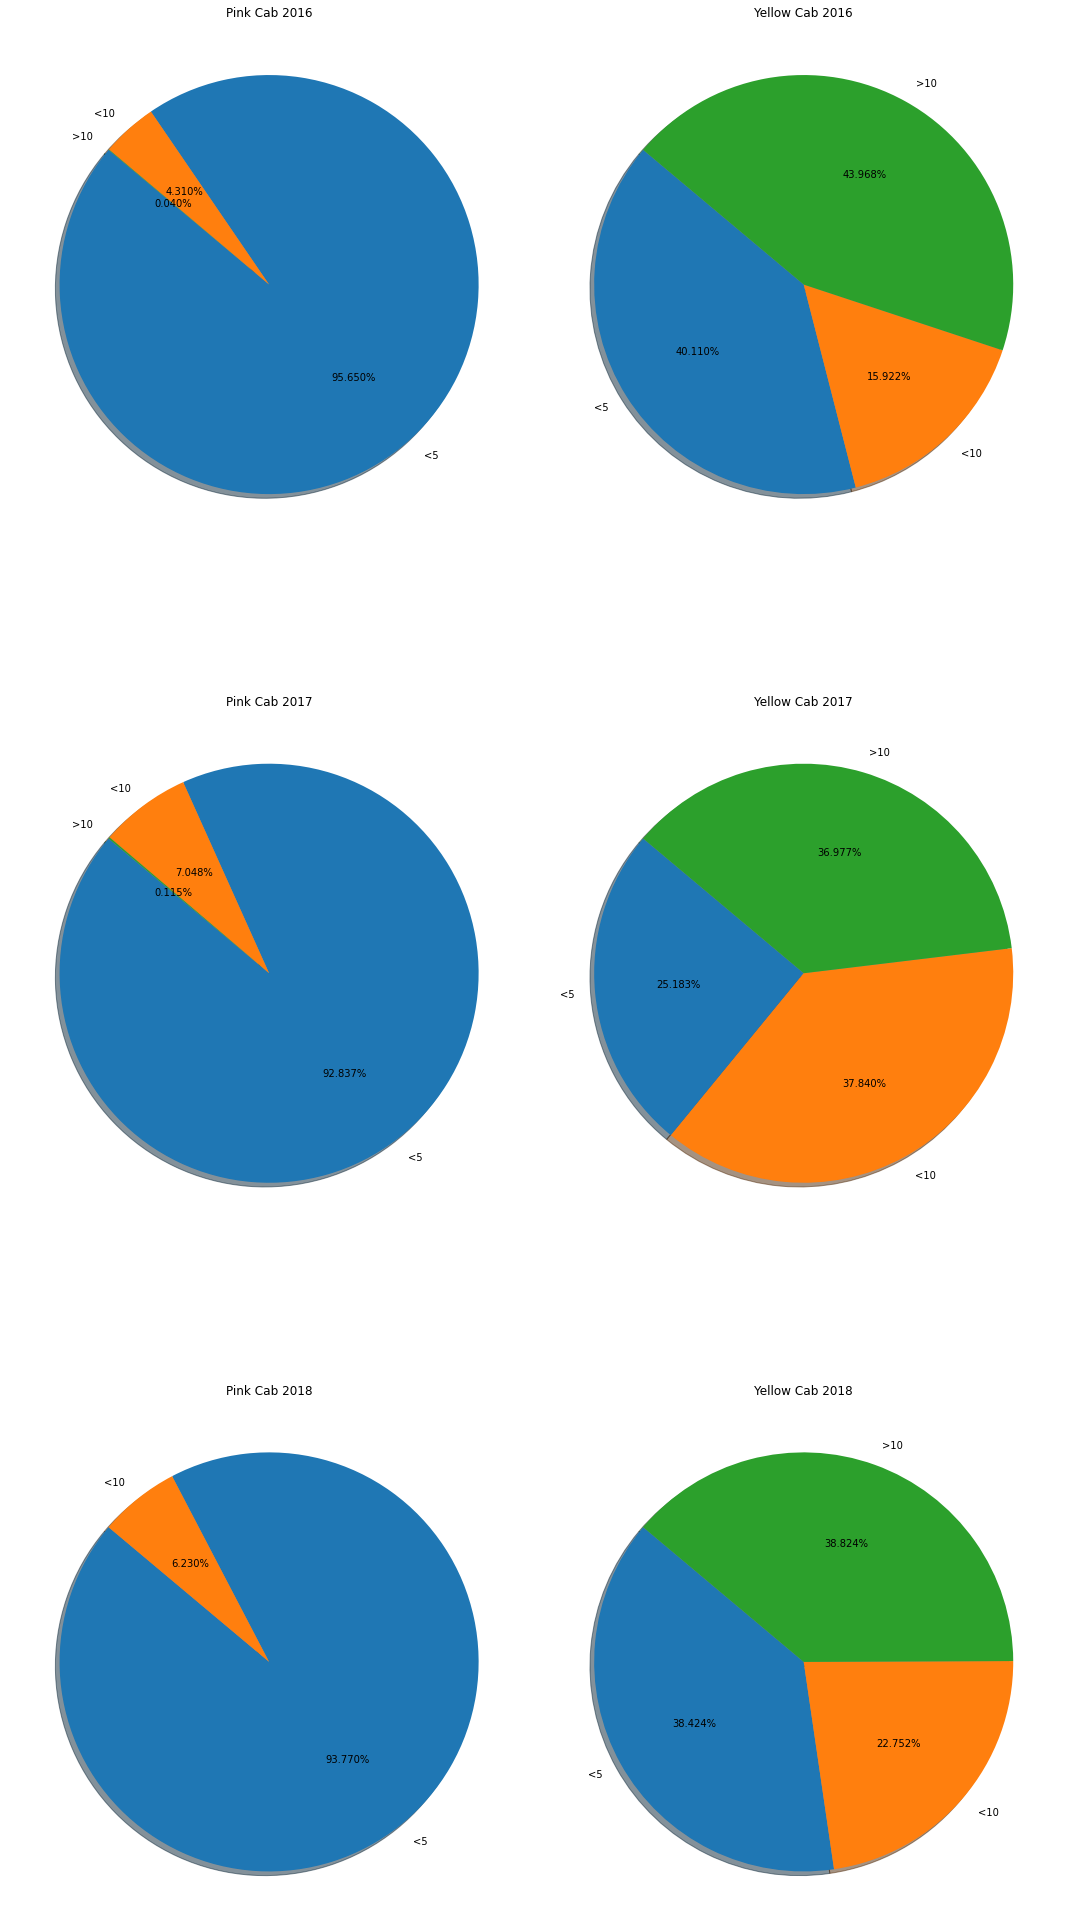

In [54]:
fig, ax = plt.subplots(3,2, figsize=(15,30))#sharex = True

ax[0,0].set_title("Pink Cab 2016")
ax[0,0].pie(day_pink_cust_ret[day_pink_cust_ret.index.get_level_values('Year')==2016]["No"],labels = ["<5","<10",">10"],autopct='%1.3f%%', shadow=True, startangle=140)

ax[0,1].set_title("Yellow Cab 2016")
ax[0,1].pie(day_yellow_cust_ret[day_yellow_cust_ret.index.get_level_values('Year')==2016]["No"],labels = ["<5","<10",">10"],autopct='%1.3f%%', shadow=True, startangle=140)

ax[1,0].set_title("Pink Cab 2017")
ax[1,0].pie(day_pink_cust_ret[day_pink_cust_ret.index.get_level_values('Year')==2017]["No"],labels = ["<5","<10",">10"],autopct='%1.3f%%', shadow=True, startangle=140)
ax[1,1].set_title("Yellow Cab 2017")
ax[1,1].pie(day_yellow_cust_ret[day_yellow_cust_ret.index.get_level_values('Year')==2017]["No"],labels = ["<5","<10",">10"],autopct='%1.3f%%', shadow=True, startangle=140)

ax[2,0].set_title("Pink Cab 2018")
ax[2,0].pie(day_pink_cust_ret[day_pink_cust_ret.index.get_level_values('Year')==2018]["No"],labels = ["<5","<10"],autopct='%1.3f%%', shadow=True, startangle=140)
ax[2,1].set_title("Yellow Cab 2018")
ax[2,1].pie(day_yellow_cust_ret[day_yellow_cust_ret.index.get_level_values('Year')==2018]["No"],labels = ["<5","<10",">10"],autopct='%1.3f%%', shadow=True, startangle=140)

fig.tight_layout()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
x = pd.DataFrame(master[(master["Company"]=="Pink Cab") & (master["Year"]==2018)].sort_values(by = ["Date of Travel"]).set_index(["Date of Travel"]).sum(level = ["Date of Travel"]).index)
x = np.array(pd.Series(range(len(x))))
x = x.reshape(-1,1)
y = np.array(master[(master["Company"]=="Pink Cab")  & (master["Year"]==2018)].sort_values(by = ["Date of Travel"]).set_index(["Date of Travel"]).sum(level = ["Date of Travel"])["Profit"]).T
y = y.reshape(-1,1)

C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/2697113083.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  x = pd.DataFrame(master[(master["Company"]=="Pink Cab") & (master["Year"]==2018)].sort_values(by = ["Date of Travel"]).set_index(["Date of Travel"]).sum(level = ["Date of Travel"]).index)
c:\users\الطارق\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:10170: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  return getattr(grouped, name)(**kwargs)
C:\Users\13D0~1\AppData\Local\Temp/ipykernel_13616/2697113083.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=42)

In [58]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [59]:
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

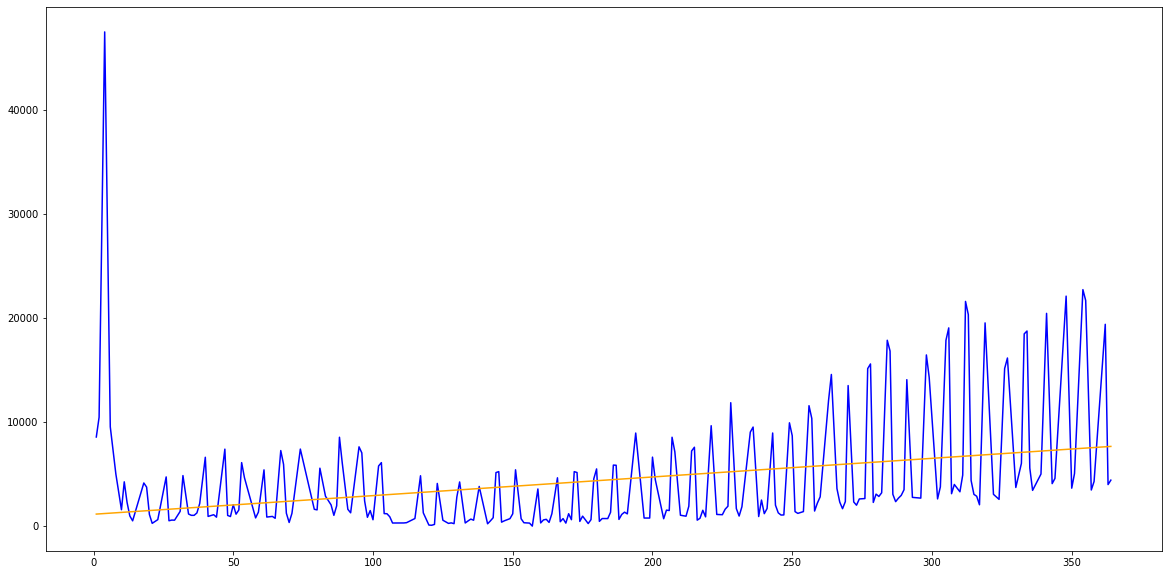

In [60]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(pd.DataFrame(y_train.T[0],X_train.T[0]).sort_index(),color = "blue")
ax.plot(pd.DataFrame(train_pred.T[0],X_train.T[0]).sort_index(),color = "orange")

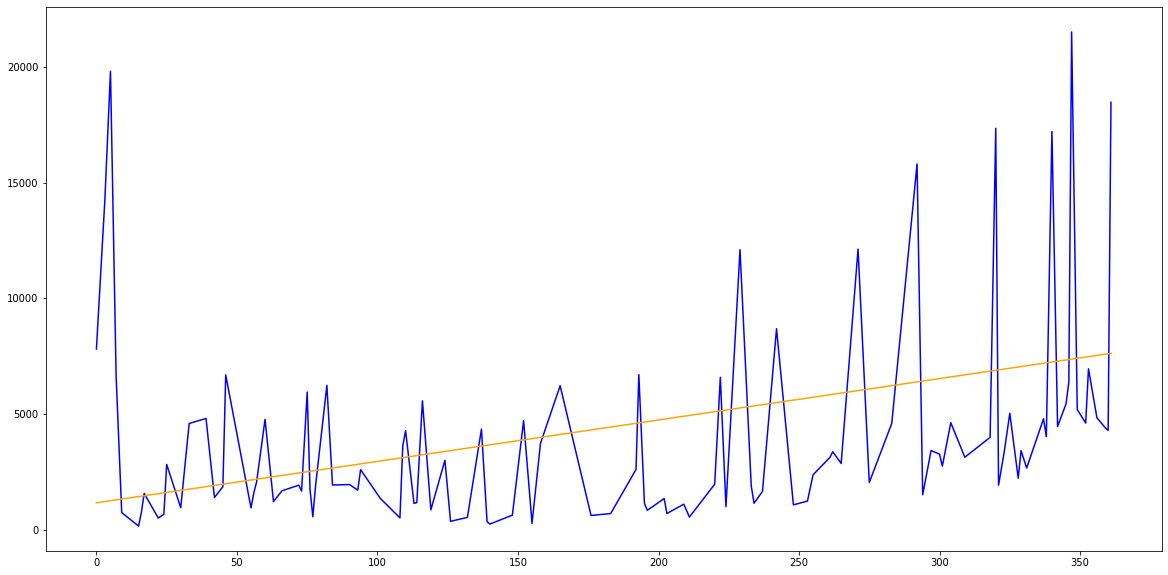

In [61]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(pd.DataFrame(y_test.T[0],X_test.T[0]).sort_index(),color = "blue")
ax.plot(pd.DataFrame(test_pred.T[0],X_test.T[0]).sort_index(),color = "orange")

In [62]:
y_2019 = np.array(range(365,365*2)).reshape(-1,1)
pred_2019 = reg.predict(y_2019)

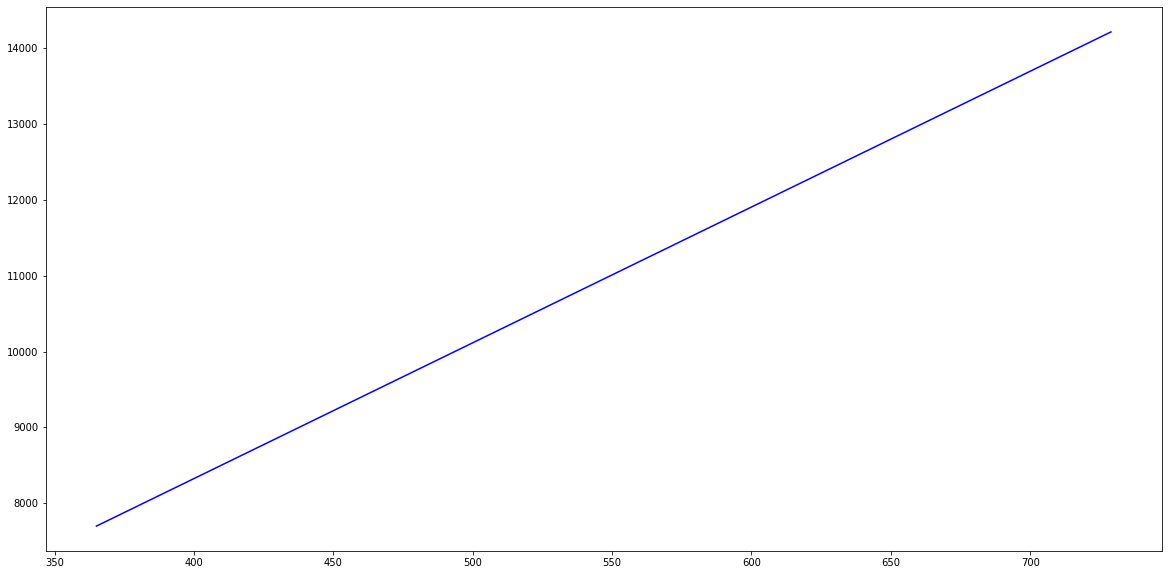

In [63]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(pd.DataFrame(pred_2019.T[0],y_2019.T[0]).sort_index(),color = "blue")

In [66]:
master.to_csv("Master.csv")